# Dataset exploration

In [1]:
import sys
sys.path.append('../src')

In [2]:
from loading import *
from tqdm import tqdm
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [3]:
data_path = "../data/"

def load_info_files(number_of_patients, data_path):
    all_infos = pd.DataFrame()
    
    for patient_id in range(1,number_of_patients+1):
        data = {}
        patient_path = "ID{value:0>{width}}".format(value=patient_id, width=2)
        info_file = "ID{value:0>{width}}_info.mat".format(value=patient_id, width=2)
        infos_file_path = os.path.join(data_path, patient_path, info_file)

        if not os.path.exists(infos_file_path):
            infos_file_name = os.path.basename(infos_file_path)
            download_patient_file(data_path, patient_id, info_file)
        
        data_infos = scipy.io.loadmat(infos_file_path)
        for s_start, s_end in [(s[0][0],s[1][0]) for s in zip(data_infos["seizure_begin"], data_infos["seizure_end"])]:
            data["id"] = int(patient_id)
            data["begin"] = s_start
            data["end"] = s_end
            data["duration"] = s_end - s_start
            data["fs"] = data_infos["fs"][0][0]
        
            all_infos = all_infos.append(data, ignore_index=True)
    
    all_infos = all_infos.set_index("id")
    return all_infos

In [4]:
all_infos_df  = load_info_files(18, data_path)

In [5]:
all_infos_df.head()

,begin,duration,end,fs
id,,,,
1.0,4.323624e+05,613.764453,4.329762e+05,512.0
1.0,1.029684e+06,589.810391,1.030274e+06,512.0
2.0,8.246041e+05,86.255547,8.246904e+05,512.0
2.0,8.374518e+05,89.869531,8.375417e+05,512.0
3.0,3.019690e+05,60.544899,3.020295e+05,512.0


In [6]:
all_infos_g = all_infos_df.groupby("id").count()
all_infos_g

,begin,duration,end,fs
id,,,,
1.0,2,2,2,2
2.0,2,2,2,2
3.0,4,4,4,4
4.0,14,14,14,14
5.0,4,4,4,4
6.0,8,8,8,8
7.0,4,4,4,4
8.0,70,70,70,70
9.0,27,27,27,27


In [7]:
all_infos_df["duration"].groupby("id").describe()

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
1.0,2.0,601.787422,16.938080,589.810391,595.798906,601.787422,607.775938,613.764453
2.0,2.0,88.062539,2.555473,86.255547,87.159043,88.062539,88.966035,89.869531
3.0,4.0,64.661915,4.148651,60.544899,61.362248,64.934365,68.234032,68.234032
4.0,14.0,41.940408,13.779049,7.772571,35.730945,42.439446,49.795509,68.696794
5.0,4.0,16.687810,0.512328,15.923165,16.650106,16.907555,16.945260,17.012964
6.0,8.0,45.890544,32.870704,29.344375,32.884414,34.144766,37.946100,126.881875
7.0,4.0,69.568815,38.622183,14.128698,57.975202,82.665872,94.259486,98.814818
8.0,70.0,21.966847,53.880018,6.223359,10.897402,12.234062,13.183867,413.385234
9.0,27.0,42.376989,35.527420,18.742682,26.836706,30.387083,33.319701,148.283464


In [8]:
all_infos_df["duration"].describe()

count    244.000000
mean      52.981614
std       76.172172
min        6.223359
25%       11.646530
50%       29.151966
75%       66.117428
max      613.764453
Name: duration, dtype: float64

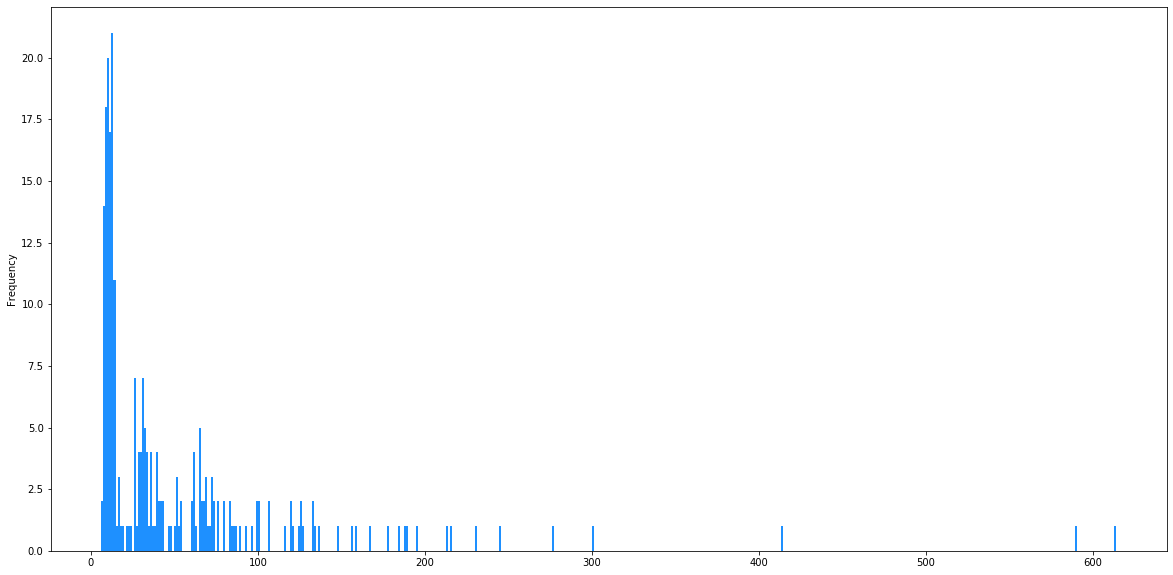

In [9]:
plt.figure(figsize=(20,10))
all_infos_df.duration.plot.hist(bins=500, color='dodgerblue')
plt.show()

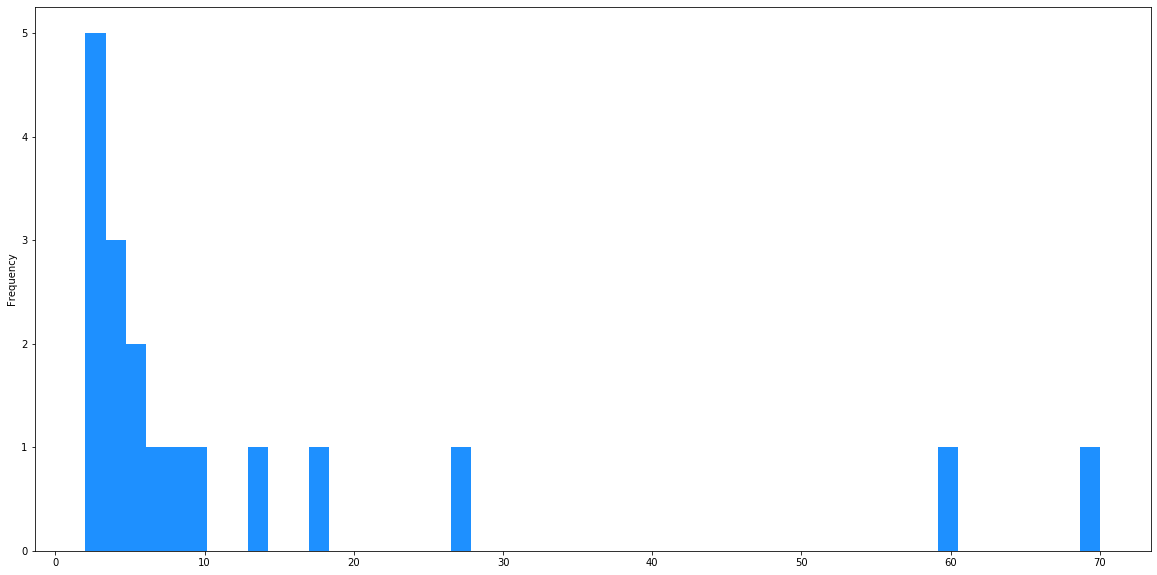

In [10]:
plt.figure(figsize=(20,10))
all_infos_df["duration"].groupby("id").count().plot.hist(bins=50, color='dodgerblue')
plt.show()